# Linear Classification Models

##### Cristobal Donoso
###### Department of Computer Science, University of Concepcion 
October 31, 2018

In classification problem we try to learn a mapping from inputs **x** to outputs **y**, where **y** $\in$ {1,...,C}, with C being the number of classes. A **binary classification** will consider C = 2. In this case y $\in$ {1, 0}. Alternativelly, we could deal with multiples classes. This case is called **multi-label classification**.<br><br>
One way to formalize the problem is as **function approximation**. We assume a unknown function such that **y** = f(**x**). The goal is to **estimate the function f** given a **labeled training set**. Then we wil be able to make prediction using $\hat{y} = \hat{f}(x)$ 

## Logistic Regression
Logistic regression measures the relationship between a dependent variable and one or more independent variables

## Binary Logistic Regression
Binary Logistic regression predicts whether something is **True** or **False**. More formally, we would  like to  estimate the probability $p(C_1|x)$ using a function called the **logistic function** or **logistic sigmoid**.
<center>
$\begin{equation}
f(x) = \frac{exp(a)}{1+exp(a)}
\end{equation}$
</center>
Note that $a = (w_0 + w_1x_1 + \cdots + w_mx_m)$. The variable y takes values y = 0 if f(x) < 0.5 and y=1 if f(x) $\geq$ 0.5<br><br>
Let's consider an example using [Iris data set](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html):
> Iris data set consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length. 

![alt text](./img/irises.png "Title")

In [25]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
iris = datasets.load_iris()

Each row represent a particular sample and each sample have 4 feature: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [9]:
iris.data[0] # let's take the first sample from data 

array([5.1, 3.5, 1.4, 0.2])

As we mencioned before, in supervised learning we need to use labels for each sample. In this case, we have 3 clases.

In [16]:
print('Label for the first sample: {0}. Corresponds to a {1}.'.format(iris.target[0], iris.target_names[0]))

Label for the first sample: 0. Corresponds to a setosa.


For simplicity we only consider 2 feature and 2 labels (Setosa vs Virginica and Versicolar)

In [47]:
x = iris.data[:, :2]
y = (iris.target != 0)*1

In [48]:
print('x shape: {0}'.format(x.shape))
print('Type of classes: {0}'.format(np.unique(y)))

x shape: (150, 2)
Type of classes: [0 1]


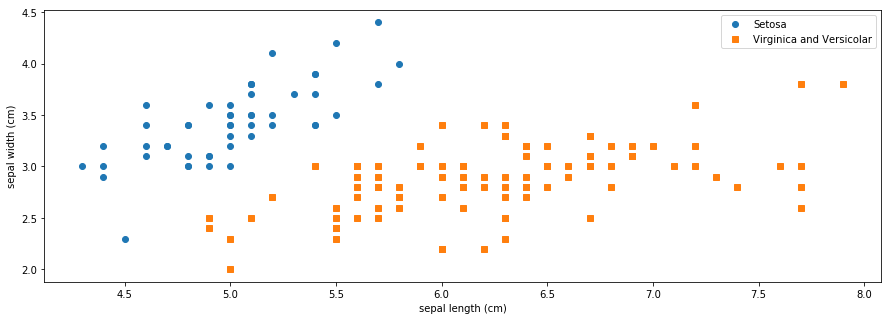

In [49]:
plt.figure(figsize=(15,5))
plt.plot(x[y==0][:,0], x[y==0][:,1], 'o', label='Setosa')
plt.plot(x[y!=0][:,0], x[y!=0][:,1], 's', label='Virginica and Versicolar')
plt.legend()
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

Now, we will define our logistic model from scikit-learn. It will create the model and then it will compute de gradient by using a iterative approach (Newton-Raphson)

In [59]:
from sklearn import linear_model
logistic_regression = linear_model.LogisticRegression(solver='newton-cg')

First we have to split our dataset into train and test subset. Then we will fit and predict using cross-validation over *K-fold* splits

In [115]:
from sklearn.model_selection import cross_validate
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
cv_results = cross_validate(logistic_regression, x_train, y_train, cv=2, return_train_score=True)

In [116]:
y_pred = logistic_regression.predict(x_test)

In [139]:
weights = logistic_regression.coef_.flatten()
bias = logistic_regression.intercept_
f = bias + np.dot(x_test, weights.T)

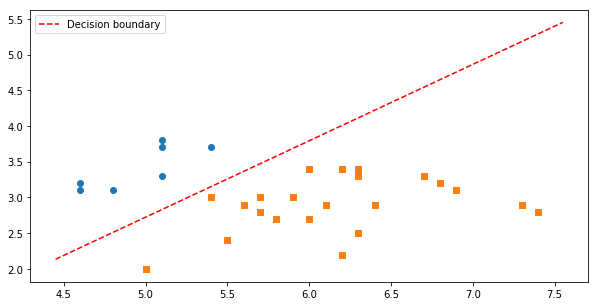

In [156]:
plt.figure(figsize=(10,5))
plt.scatter(x_test[y_pred==0][:,0], x_test[y_pred==0][:,1], marker='o')
plt.scatter(x_test[y_pred!=0][:,0], x_test[y_pred!=0][:,1], marker='s')
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * weights[0] + bias)/weights[1]
plt.plot(x_vals, y_vals, '--', c="red", label='Decision boundary')
plt.legend()
plt.show()

## Non-Linear Decision Boundaries

Now we will try to estimate the sample class given all classes in iris dataset

In [252]:
x = iris.data[:,:2]
y = iris.target

In [253]:
print('number of features: {0}\nType of classes: {1}'.format(x.shape, np.unique(y)))

number of features: (150, 2)
Type of classes: [0 1 2]


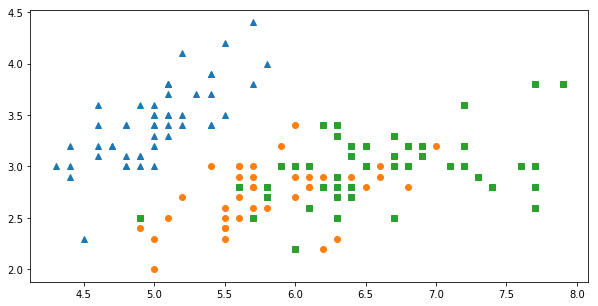

In [254]:
plt.figure(figsize=(10,5))
plt.plot(x[y==0][:,0], x[y==0][:,1], '^')
plt.plot(x[y==1][:,0], x[y==1][:,1], 'o')
plt.plot(x[y==2][:,0], x[y==2][:,1], 's')
plt.show()

In [255]:
lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [258]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [261]:
y_pred = lr.predict(x_test)

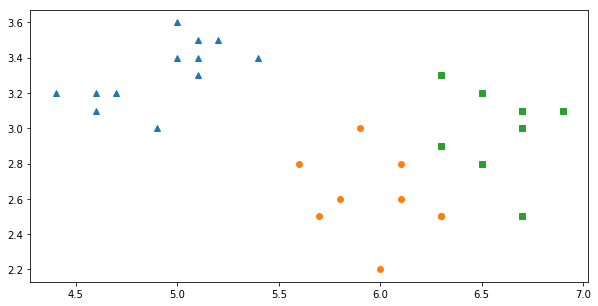

In [263]:
plt.figure(figsize=(10,5))
plt.plot(x_test[y_pred == 0][:,0], x_test[y_pred == 0][:,1], '^')
plt.plot(x_test[y_pred == 1][:,0], x_test[y_pred == 1][:,1], 'o')
plt.plot(x_test[y_pred == 2][:,0], x_test[y_pred == 2][:,1], 's')

In [315]:
means = lr.coef_

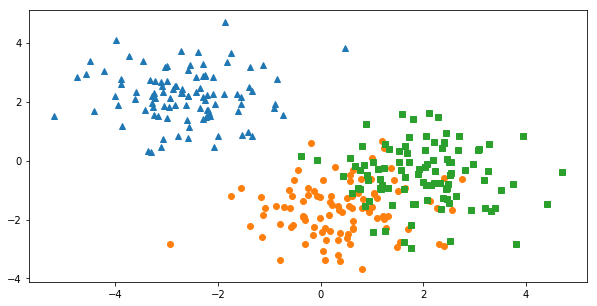

In [316]:
x0 = np.random.normal(means[0], size=[100,2])
x1 = np.random.normal(means[1], size=[100,2])
x2 = np.random.normal(means[2], size=[100,2])
plt.figure(figsize=(10,5))
plt.plot(x0[:,0], x0[:,1], '^')
plt.plot(x1[:,0], x1[:,1], 'o')
plt.plot(x2[:,0], x2[:,1], 's')
plt.show()